In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import os
import sys
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score

test = pd.read_csv('test_census.csv', index_col = 0)
train = pd.read_csv('census.csv')

In [2]:
test.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,21.0,Private,10th,6.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.0,United-States
1,49.0,Private,Bachelors,13.0,Married-civ-spouse,Adm-clerical,Wife,White,Female,0.0,0.0,40.0,United-States
2,44.0,Self-emp-not-inc,Assoc-acdm,12.0,Married-civ-spouse,Other-service,Wife,White,Female,0.0,0.0,99.0,United-States
3,34.0,Private,Bachelors,13.0,Married-civ-spouse,Sales,Husband,White,Male,7298.0,0.0,46.0,United-States
4,24.0,Private,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States


In [3]:
train.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [4]:
test['test'] = 1
train['test'] = 0

train['income'] = train.income.replace({'<=50K':0, '>50K':1})


all_data = pd.concat([test,train])

all_data.head()

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,age,capital-gain,capital-loss,education-num,education_level,hours-per-week,income,marital-status,native-country,occupation,race,relationship,sex,test,workclass
0,21.0,0.0,0.0,6.0,10th,40.0,NaN,Married-civ-spouse,United-States,Craft-repair,White,Husband,Male,1,Private
1,49.0,0.0,0.0,13.0,Bachelors,40.0,NaN,Married-civ-spouse,United-States,Adm-clerical,White,Wife,Female,1,Private
2,44.0,0.0,0.0,12.0,Assoc-acdm,99.0,NaN,Married-civ-spouse,United-States,Other-service,White,Wife,Female,1,Self-emp-not-inc
3,34.0,7298.0,0.0,13.0,Bachelors,46.0,NaN,Married-civ-spouse,United-States,Sales,White,Husband,Male,1,Private
4,24.0,0.0,0.0,9.0,HS-grad,40.0,NaN,Married-civ-spouse,United-States,Machine-op-inspct,White,Husband,Male,1,Private


In [5]:
all_data.describe()


,age,capital-gain,capital-loss,education-num,hours-per-week,income,test
count,90427.000000,90429.000000,90427.000000,90430.000000,90431.000000,45222.000000,90444.000000
mean,38.548962,1100.507216,88.595652,10.118489,40.938683,0.247844,0.500000
std,13.218170,7499.791134,404.963579,2.552832,12.007423,0.431766,0.500003
min,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,9.000000,40.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,10.000000,40.000000,0.000000,0.500000
75%,47.000000,0.000000,0.000000,13.000000,45.000000,0.000000,1.000000
max,90.000000,99999.000000,4356.000000,16.000000,99.000000,1.000000,1.000000


In [6]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90444 entries, 0 to 45221
Data columns (total 15 columns):
age                90427 non-null float64
capital-gain       90429 non-null float64
capital-loss       90427 non-null float64
education-num      90430 non-null float64
education_level    90424 non-null object
hours-per-week     90431 non-null float64
income             45222 non-null float64
marital-status     90423 non-null object
native-country     90428 non-null object
occupation         90422 non-null object
race               90425 non-null object
relationship       90428 non-null object
sex                90425 non-null object
test               90444 non-null int64
workclass          90422 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 11.0+ MB


In [7]:
# select categorical variables
cat_vars = [x for x in all_data.columns if all_data[x].dtype == 'object']
print('Categorical Variables')
print(cat_vars)

# select numeric variables
print('Numeric Variables')
num_vars = [x for x in all_data.columns if x not in cat_vars]
num_vars.remove('test')
num_vars.remove('income')
print(num_vars)




Categorical Variables
['education_level', 'marital-status', 'native-country', 'occupation', 'race', 'relationship', 'sex', 'workclass']
Numeric Variables
['age', 'capital-gain', 'capital-loss', 'education-num', 'hours-per-week']


In [8]:
all_data[cat_vars].nunique()


education_level    16
marital-status      7
native-country     41
occupation         14
race                5
relationship        6
sex                 2
workclass           7
dtype: int64

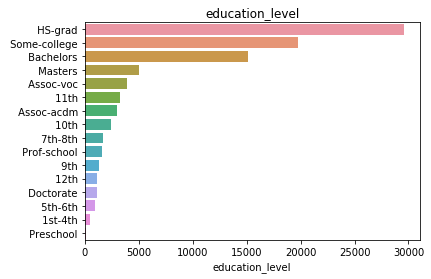

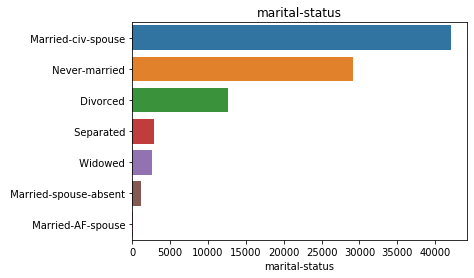

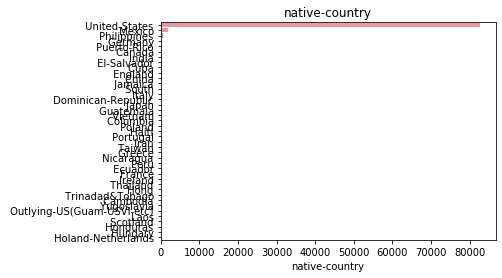

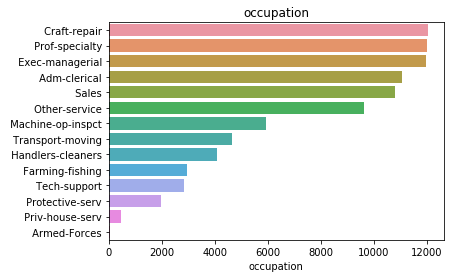

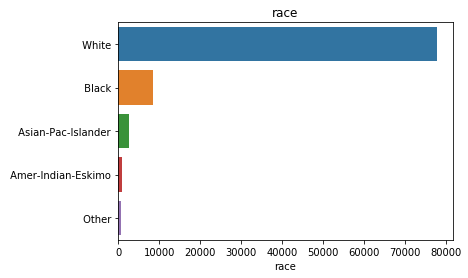

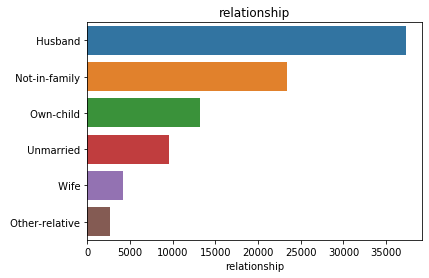

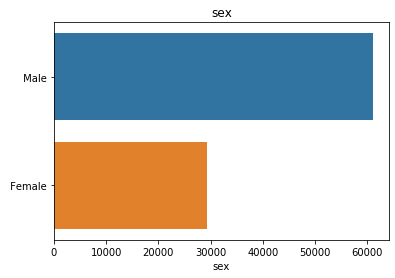

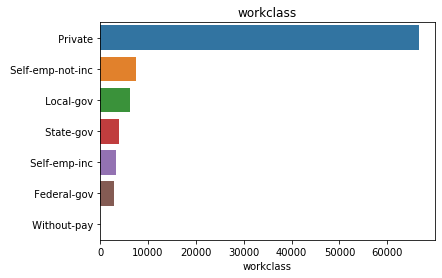

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in cat_vars:
    sns.barplot(all_data[i].value_counts(),all_data[i].value_counts().index).set_title(i)
    plt.show()

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


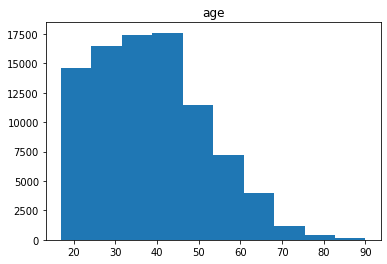

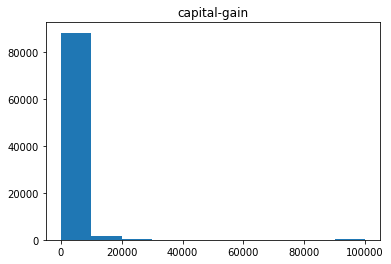

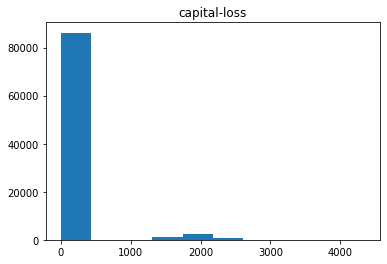

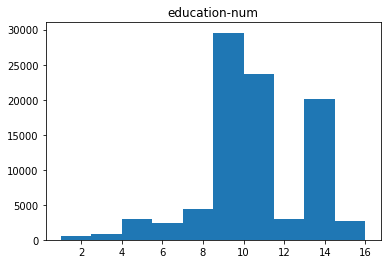

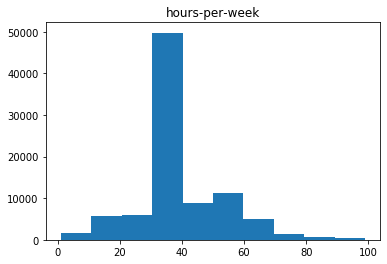

In [10]:
for i in num_vars:
    plt.hist(all_data[i])
    plt.title(i)
    plt.show()

# Cleaning the data


In [11]:
# Missing Numeric Data
for x in num_vars:
    if all_data[x].isna().sum() > 0:
        print(x,all_data[x].isna().sum())



age 17
capital-gain 15
capital-loss 17
education-num 14
hours-per-week 13


In [12]:
# All of these can be imputed with the median
imp_num = SimpleImputer(missing_values=np.nan, strategy='median')
all_data[num_vars] = imp_num.fit_transform(all_data[num_vars])

print()

# Check if any are left
for x in num_vars:
    if all_data[x].isna().sum() > 0:
        print(x,all_data[x].isna().sum())

In [14]:
# Categorical Data
for x in cat_vars:
    if all_data[x].isna().sum() > 0:
        print(x,all_data[x].isna().sum())
        

education_level 20
marital-status 21
native-country 16
occupation 22
race 19
relationship 16
sex 19
workclass 22


In [18]:
# Impute mode for categorical variables
imp_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
all_data[cat_vars] = imp_cat.fit_transform(all_data[cat_vars])

# One hot encoding
# 1. drop native-country
cat_vars.remove('native-country')
one_hot = pd.get_dummies(all_data, columns = cat_vars)

one_hot

,age,capital-gain,capital-loss,education-num,hours-per-week,income,native-country,test,education_level_ 10th,education_level_ 11th,...,relationship_ Wife,sex_ Female,sex_ Male,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay
0,21.0,0.0,0.0,6.0,40.0,NaN,United-States,1,1,0,...,0,0,1,0,0,1,0,0,0,0
1,49.0,0.0,0.0,13.0,40.0,NaN,United-States,1,0,0,...,1,1,0,0,0,1,0,0,0,0
2,44.0,0.0,0.0,12.0,99.0,NaN,United-States,1,0,0,...,1,1,0,0,0,0,0,1,0,0
3,34.0,7298.0,0.0,13.0,46.0,NaN,United-States,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,24.0,0.0,0.0,9.0,40.0,NaN,United-States,1,0,0,...,0,0,1,0,0,1,0,0,0,0
5,52.0,0.0,0.0,4.0,16.0,NaN,United-States,1,0,0,...,0,1,0,0,0,1,0,0,0,0
6,61.0,0.0,0.0,4.0,50.0,NaN,United-States,1,0,0,...,0,0,1,0,0,1,0,0,0,0
7,24.0,0.0,0.0,9.0,40.0,NaN,United-States,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8,30.0,0.0,0.0,9.0,22.0,NaN,United-States,1,0,0,...,0,0,1,0,0,1,0,0,0,0
9,42.0,0.0,0.0,9.0,60.0,NaN,United-States,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [16]:
all_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 90444 entries, 0 to 45221
Data columns (total 15 columns):
age                90444 non-null float64
capital-gain       90444 non-null float64
capital-loss       90444 non-null float64
education-num      90444 non-null float64
education_level    90444 non-null object
hours-per-week     90444 non-null float64
income             45222 non-null float64
marital-status     90444 non-null object
native-country     90444 non-null object
occupation         90444 non-null object
race               90444 non-null object
relationship       90444 non-null object
sex                90444 non-null object
test               90444 non-null int64
workclass          90444 non-null object
dtypes: float64(6), int64(1), object(8)
memory usage: 11.0+ MB


In [19]:
X = [x for x in one_hot.columns if x not in cat_vars]
X

['age',
 'capital-gain',
 'capital-loss',
 'education-num',
 'hours-per-week',
 'income',
 'native-country',
 'test',
 'education_level_ 10th',
 'education_level_ 11th',
 'education_level_ 12th',
 'education_level_ 1st-4th',
 'education_level_ 5th-6th',
 'education_level_ 7th-8th',
 'education_level_ 9th',
 'education_level_ Assoc-acdm',
 'education_level_ Assoc-voc',
 'education_level_ Bachelors',
 'education_level_ Doctorate',
 'education_level_ HS-grad',
 'education_level_ Masters',
 'education_level_ Preschool',
 'education_level_ Prof-school',
 'education_level_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupation_ Farming-fishing',
 'occupation_ Handle

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[2.41683470e-01 8.14818187e-02 2.86060324e-02 4.25496559e-02
 1.31893010e-01 2.11072092e-03 3.28898763e-03 9.10839172e-04
 3.68949479e-04 6.50743560e-04 1.61646865e-03 1.74150510e-03
 3.14557141e-03 3.06019919e-03 1.61918749e-02 5.46150582e-03
 1.49985477e-02 1.16397788e-02 9.34906531e-05 9.55089554e-03
 6.57880323e-03 3.85045008e-03 4.39450181e-04 6.54959801e-02
 1.13876560e-03 2.85586255e-02 1.38176155e-03 1.54479041e-03
 5.30847937e-03 5.19725847e-05 6.27874051e-03 2.53387404e-02
 5.28408494e-03 3.98656884e-03 3.46342911e-03 8.00777762e-03
 1.91591703e-04 1.54677696e-02 2.76841645e-03 5.36875375e-03
 3.77228595e-03 3.36055997e-03 1.73831777e-03 4.16478312e-03
 5.12752172e-03 1.44828157e-03 6.84459460e-03 8.56734815e-02
 4.10592255e-03 1.09113674e-03 1.09527904e-02 2.74624041e-03
 1.27127643e-02 2.00021345e-02 4.36585505e-03 5.50239777e-03
 5.34884204e-03 9.52229396e-03 5.72906521e-03 8.92302132e-03
 5.11346942e-03 2.05222888e-04]


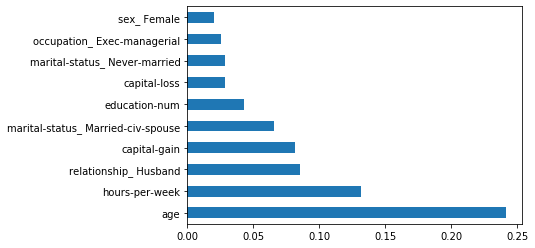

In [20]:
final_df = one_hot[X]
final_df.drop('native-country', inplace = True, axis = 1)
train_set = final_df[final_df.test == 0]
train_set.drop('test', inplace=True, axis=1)
test_set = final_df[final_df.test == 1]
test_set.drop('test', inplace=True, axis=1)

cols = [x for x in train_set.columns]
cols.remove('income')
X = cols

X = train_set[X]
y = train_set.income

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

# Model
## Trying a linear Discriminant Analysis Model

In [21]:
# Specifying x_train
X_train = X

# Specifying x_test
cols = [x for x in test_set.columns]
cols.remove('income')
x_test = test_set[cols]

# Specifying y_train
y_train = train_set.income

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()

In [23]:
# Fitting the model 
model.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = model.predict(x_test)
output = pd.DataFrame({'id': test_set.index,
                       'income': preds})
output.to_csv('submission_donations_discAn.csv', index=False)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


## Random forest model


In [24]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

# Fitting the model 
model.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = model.predict(x_test)

output = pd.DataFrame({'id': test_set.index,
                       'income': preds})
output.to_csv('submission_donations_rf.csv', index=False)

C:\Users\User\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
